[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW5.ipynb)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

**Problem 1**: In class when we used the linnerud data, we assumed that Weight was the target variable and Chins was the predictor. For this problem use Pulse as the target variable and Situps as the predictor.

Part a. Make a scatterplot of Pulse versus Situps.

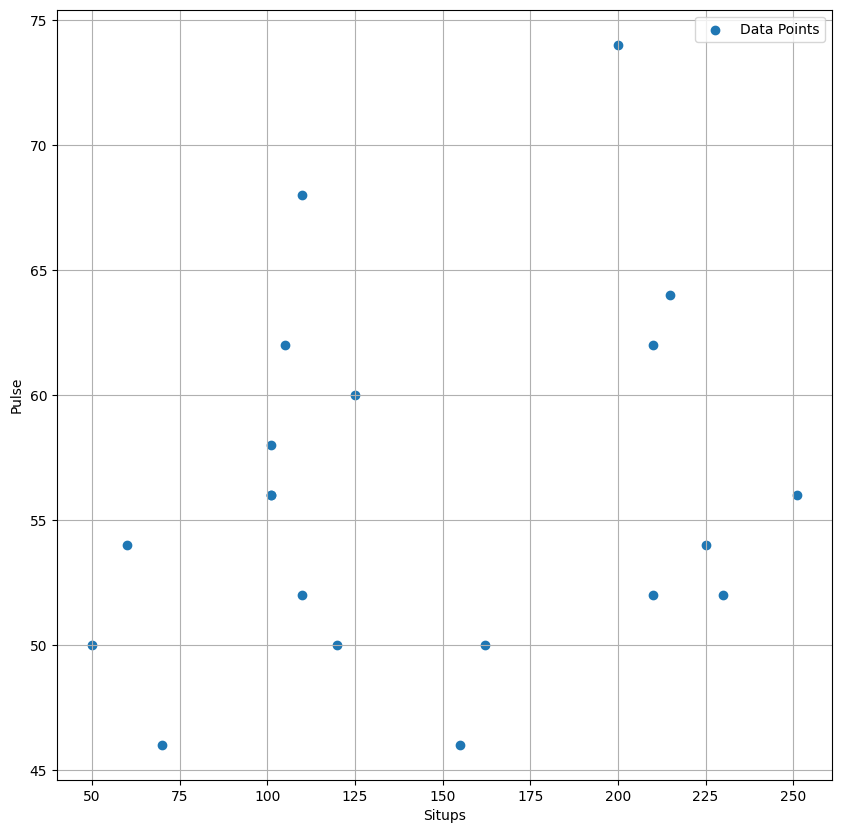

In [6]:
linnerud = load_linnerud(as_frame=True)

x = linnerud.data['Situps']
y = linnerud.target['Pulse']

plt.figure(figsize=(10,10))
plt.scatter(x,y, label = "Data Points")

plt.xlabel("Situps")
plt.ylabel("Pulse")
plt.legend()
plt.grid(True)
plt.show()

Part b. Fit a simple linear regression model to the data using Situps as a predictor and Pulse as the target.

In [7]:
x_reg = pd.DataFrame(x)

reg_prep = LinearRegression()
reg_prep.fit(x_reg, y)



LinearRegression()

Part c. What are the estimated slope and intercept of the model?

In [8]:
intercept = reg_prep.intercept_
slope = reg_prep.coef_

print("Intercept: ", intercept)
print("Slope: ", slope)

Intercept:  52.32529029490991
Slope:  [0.02593411]


Part d. Make a new plot of the data with the regression line plotted on top of it.

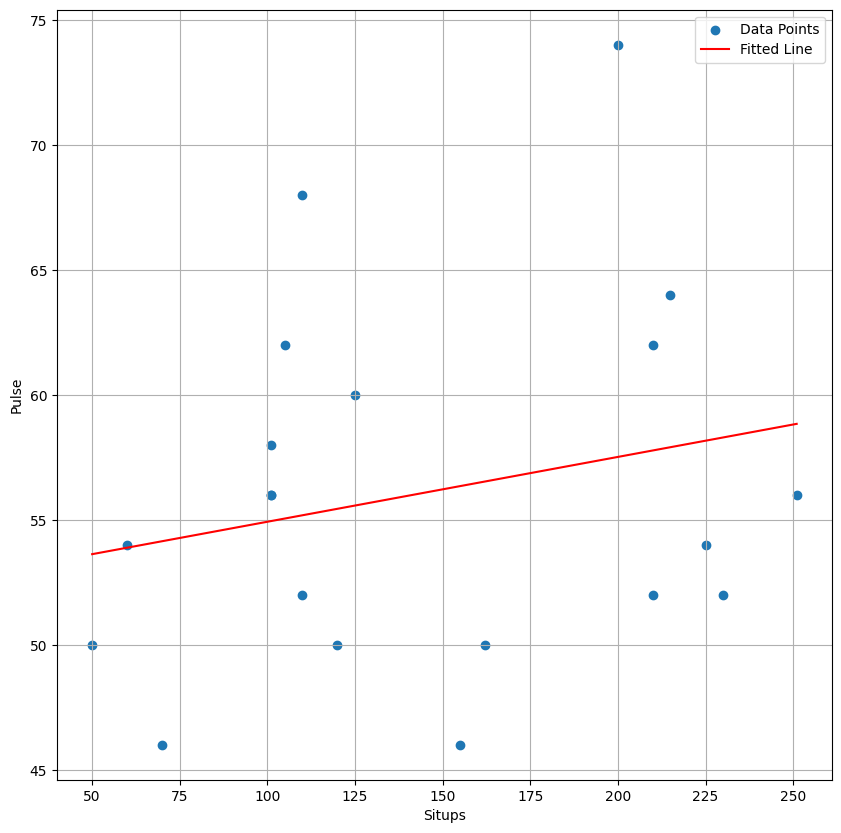

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, label = "Data Points")
x_axis = np.linspace(min(x), max(x), 100)
plt.plot(x_axis, (intercept + slope * x_axis), label = 'Fitted Line', color='red')
plt.xlabel("Situps")
plt.ylabel("Pulse")
plt.legend()
plt.grid(True)
plt.show()

**Problem 2**: Consider modeling $Y$ as a function of $X$ using linear regression in two different contexts. (A) $Y$ follows a normal distribution with mean $\beta_0 + \beta_1 X$ and variance $\sigma^2$ and (B) the regression line that minimizes the target function $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$.

Part a. What is the difference between the estimates for $\beta_0$ and $\beta_1$ when using maximum likelihood estimation for (A) and target function minimization for (B).

The estimates for β0 and β1 don't change between the two types of functions, as the base for target function minimisation, (β0+β1xi), is essentially the same function used in the maximum likelihood estimaton.

Part b. What is the difference in the estimate for $\sigma$ between the two methods?

Sigma is not used in target function minimisation. Thus, the difference is the fact that only one uses it.

**Problem 3** : Use the code in the following chunk to import the car stopping data set into your python environment. This data set has two variables. The variable speed is the speed a car is going and dist is the distance the car traveled before stopping. Use speed as a predictor and dist as a target variable for the following questions.

In [10]:
%pip install pydataset
from pydataset import data
cars = data("cars")
x = cars.speed
y = cars.dist

Part a. Build a decision tree with a maximum depth of 2. Plot the tree.

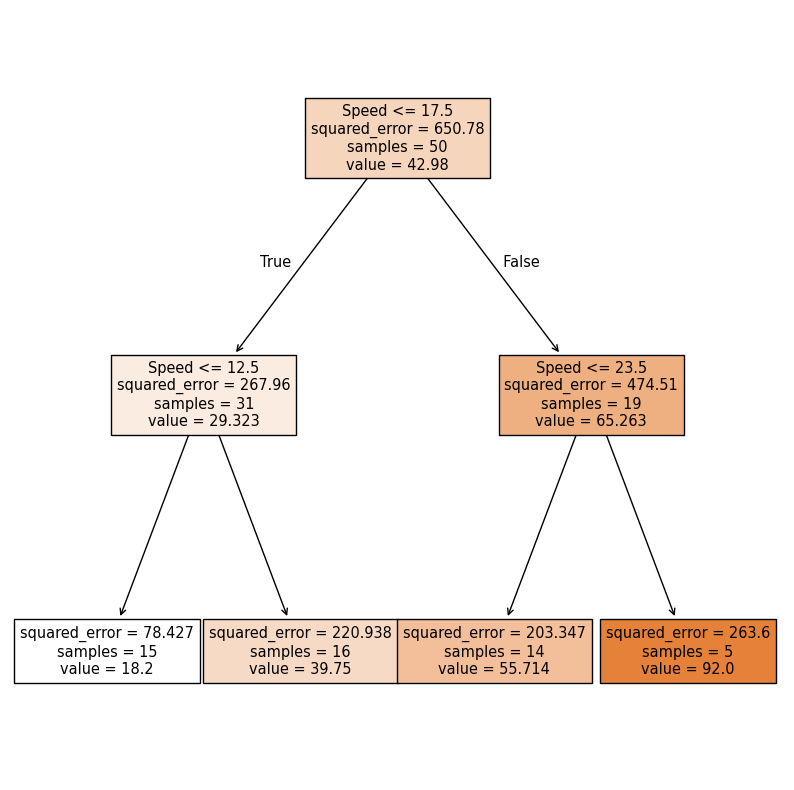

In [11]:
x_df = pd.DataFrame(x)
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(x_df, y)

plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=['Speed'], filled=True)
plt.show()

Part b. What is the split point for the first split in the decision tree?

The split point for the first split is the speed being less than or equal to 17.5.

Part c. How many data points end up in each leaf node of the decision tree.

There are two data points per each leaf node of the decision tree.

Part. d. Using the decision tree model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

The estimated stopping distance of a car travelling at a speed of 15 is 39.75.

**Problem 4**: Test a few other models for the car data set.

Part a. Build the decision tree with a maximum depth of 3 instead of 2. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

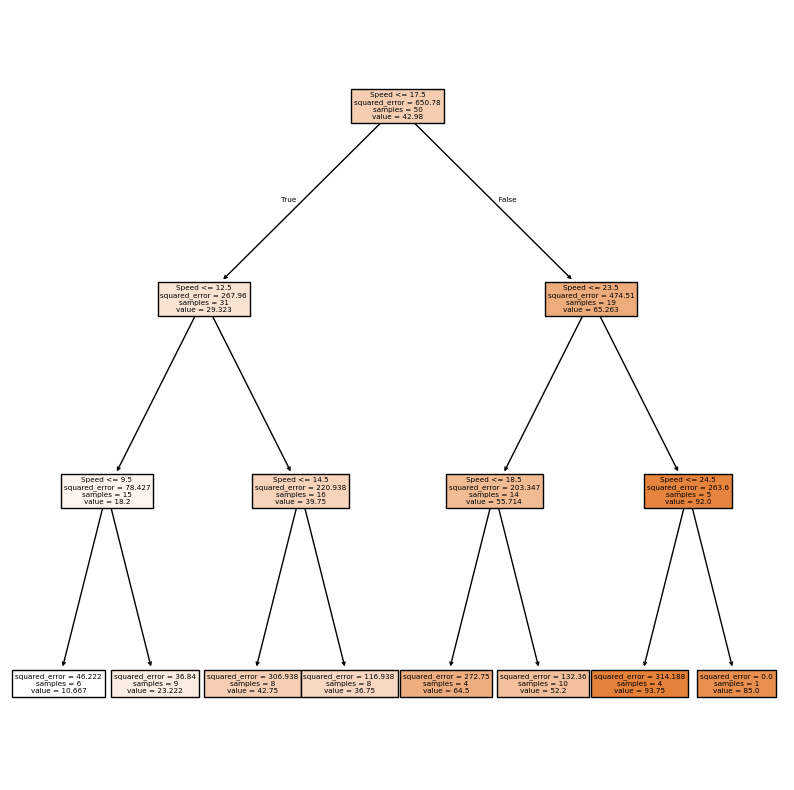

In [12]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_df, y)

plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=['Speed'], filled=True)
plt.show()

Based off of this tree, the estimated stopping difference of a car that is travelling at a speed of 15 is 36.75.

Part b. Fit a linear regression model to this data. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

Intercept:  -17.579094890510973
Slope:  [3.93240876]


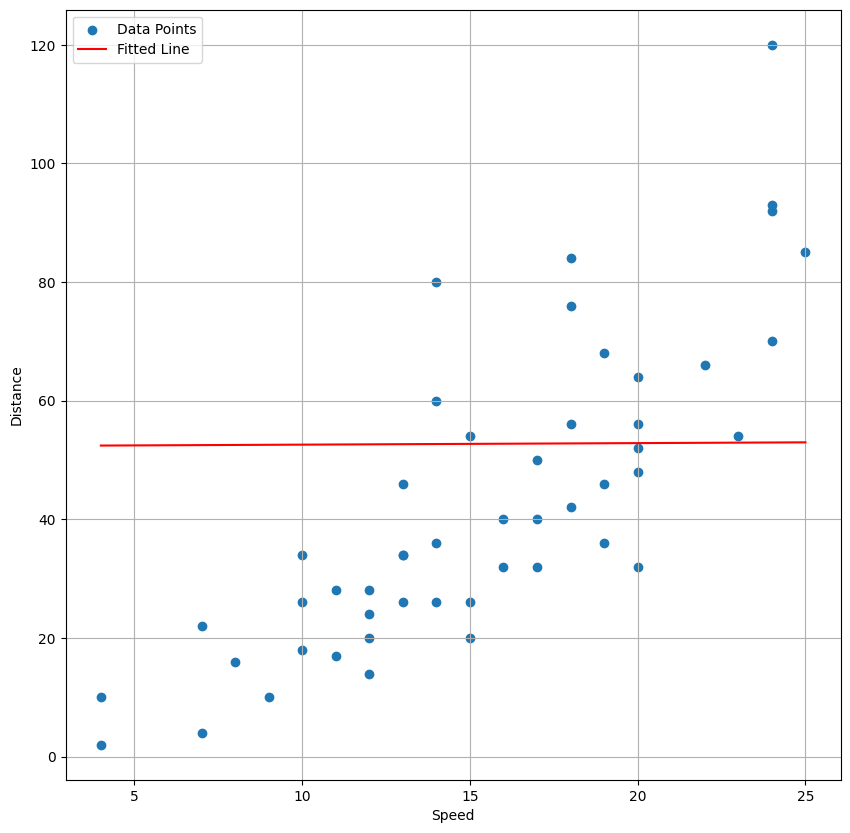

In [14]:
linear = LinearRegression()
mod_lin = linear.fit(x_df, y)

lin_intercept = mod_lin.intercept_
lin_slope = mod_lin.coef_

print("Intercept: ", lin_intercept)
print("Slope: ", lin_slope)

plt.figure(figsize=(10,10))
plt.scatter(x,y, label = "Data Points")
x_axis = np.linspace(min(x.values), max(x.values), 400)
plt.plot(x_axis, intercept + slope * x_axis, label = 'Fitted Line', color='red')
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

Based off of this model, the estimated stopping distance for a car travelling at a speed of 15 should be around 50-55

**Problem 5**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Build a linear regression model for revenue using the other variables as predictors.

In [21]:
data = pd.read_csv("https://richardson.byu.edu/220/revenue_data.csv")
x = data.drop(columns=['MonthlyRevenue'])
y = data.MonthlyRevenue

x_reg = pd.DataFrame(x)

reg_prep = LinearRegression()
reg_prep.fit(x_reg, y)

data

,AdSpend,AvgTraffic,DiscountRate,MonthlyRevenue
0,22.483571,5357.787360,6.811145,144.998391
1,19.308678,5560.784526,8.801250,117.707055
2,23.238443,6083.051243,10.010487,148.816156
3,27.615149,6053.802052,10.093961,166.576876
4,18.829233,3622.330632,9.099869,119.633833
...,...,...,...,...
195,21.926587,4530.824348,8.979967,139.985444
196,15.580713,3286.865471,9.460250,103.320664
197,20.768626,6353.872374,8.042473,142.847773
198,20.291044,4885.460155,9.111413,126.472202


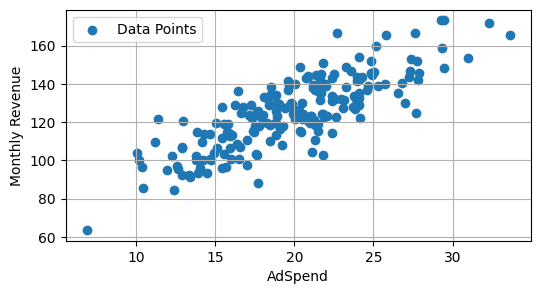

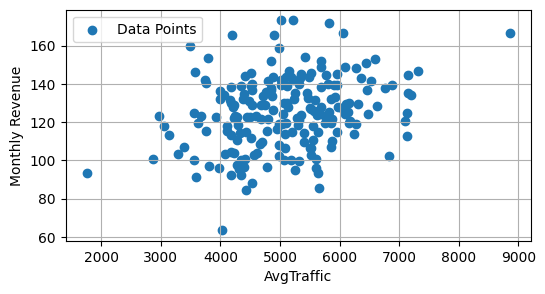

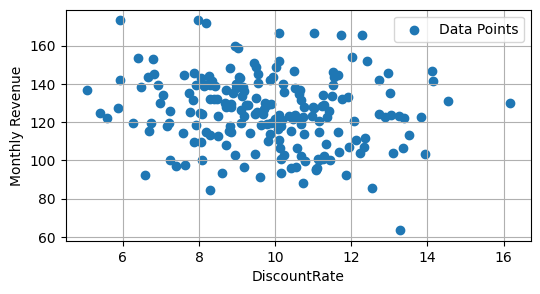

In [19]:

# Plotting each predictor against the target variable
for col in x.columns:
    plt.figure(figsize=(6,3))
    plt.scatter(x_reg[col], y, label = "Data Points")
    plt.xlabel(col)
    plt.ylabel("Monthly Revenue")
    plt.legend()
    plt.grid(True)
    plt.show()

Part b. Interpret the coefficient for AdSpend in the context of the problem.

In [20]:
x_ad = pd.DataFrame(data.AdSpend)

reg_prep = LinearRegression()
reg_prep.fit(x_ad, y)

intercept = reg_prep.intercept_
slope = reg_prep.coef_

print("Intercept: ", intercept)
print("Coefficient: ", slope)

Intercept:  59.72333454904759
Coefficient:  [3.30142146]


The coefficient for AdSpend in the context of the problem implies that for each additional unit of money that is spent on ads, the monthly revenue should increase by 3 monetary units, holding all else constant. (I couldn't find what the actual unit of cash was being measuted here :/)